In [1]:
# Slides 15 mins
# 7:05 PM
# 7:20 PM

# 7:20 PM
# 7:30 PM
import os
print(os.path.dirname(os.getcwd()).split('\\')[-1])

<font color='red'>Comment</font>

Autocorrelation is for seeing how well a time series correlates to a lagged copy of itself.

The question is- can past values predict future values?

PACF plot helps identify the number of lags we should use in ARMA.

In [2]:
import pandas as pd
from pathlib import Path
csvpath="C:/Users/CS_Knit_tinK_SC/Documents/My Data Sources/111121/03_nasdaq.csv"
#csvpath = Path('../Resources/nasdaq.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
%matplotlib inline

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2012-01-03,25.030001,25.270000,24.910000,24.959999,21.894108,1468800,0.018360
2012-01-04,24.690001,24.799999,24.430000,24.620001,21.595875,1100900,-0.013622
2012-01-05,24.360001,24.719999,24.139999,24.660000,21.630962,1072200,0.001625
2012-01-06,24.629999,24.900000,24.379999,24.430000,21.429213,1192400,-0.009327
2012-01-09,24.410000,24.660000,24.270000,24.330000,21.341490,863900,-0.004093


<font color='red'>Comment</font>

Stationary? ARMA assumes a stationary time series.

How do you **stationarize** it?

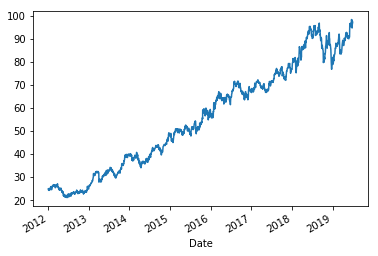

In [4]:
# The series is non-stationary (Trends upwards)
df.Close.plot()

In [5]:
# Transform into a stationary process
df['Return'] = df['Close'].pct_change()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2012-01-04,24.690001,24.799999,24.430000,24.620001,21.595875,1100900,-0.013622
2012-01-05,24.360001,24.719999,24.139999,24.660000,21.630962,1072200,0.001625
2012-01-06,24.629999,24.900000,24.379999,24.430000,21.429213,1192400,-0.009327
2012-01-09,24.410000,24.660000,24.270000,24.330000,21.341490,863900,-0.004093
2012-01-10,24.580000,25.250000,24.490000,25.170000,22.078316,2647200,0.034525


In [6]:
# Select only the returns
returns = df.loc[:, 'Return']  # vs returns = df['Return']
type(returns)

pandas.core.series.Series

<font color='red'>Comment</font>

How do you show with some level of confidence that the following price series is stationary?

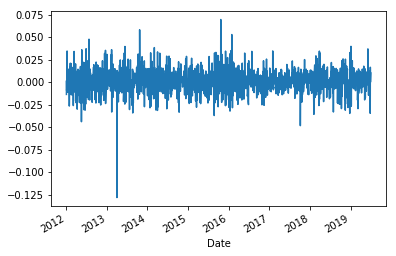

In [7]:
# Stationarity now seen
returns.plot()

# ARMA Model

In [8]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA
# from statsmodels.tsa.arima.model import ARIMA
# ARIMA (1, 0, 1) = ARMA(1, 1)

# statsmodels.tsa.arima_model.ARMA = going away
# statsmodels.tsa.arima.model.ARIMA = replacing

<font color='red'>Comment</font>

Begin a pattern you'll see over and over:
1. prep data
2. fit/train model
3. more to come...

Either way, PACF (skipped) informs us how many lags we should use for the following. We see this in the next exercise.

In [9]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model = ARMA(returns.values, order=(1, 1))  # (AR = past values and errors, MA = past errors)

C:\Users\CS_Knit_tinK_SC\anaconda3\envs\TSMLPyViz\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<font color='red'>Comment</font>

When we get to linear regression, we'll watch a video to make this word "fit" make sense.

In [10]:
# Fit the model to the data
results = model.fit()

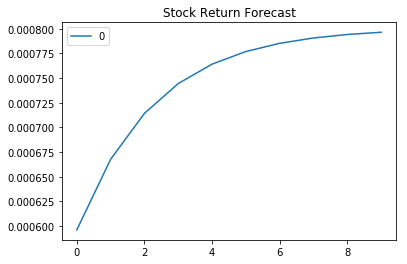

In [11]:
# Plot the forecasted return for the next 10 days
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Stock Return Forecast")

In [12]:
# Summarize the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1884
Model:                     ARMA(1, 1)   Log Likelihood                5578.344
Method:                       css-mle   S.D. of innovations              0.013
Date:                Sat, 13 Nov 2021   AIC                         -11148.689
Time:                        08:32:55   BIC                         -11126.524
Sample:                             0   HQIC                        -11140.526
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      3.040      0.002       0.000       0.001
ar.L1.y        0.6503      0.258      2.516      0.012       0.144       1.157
ma.L1.y       -0.6809      0.249     -2.735      0.006      -1.169      -0.193
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5378           +0.0000j            1.5378            0.0000
MA.1            1.4687           +0.0000j            1.4687            0.0000
-----------------------------------------------------------------------------
"""

<font color='red'>Comment</font>

Briefly:

Low AIC and BIC indicate better accuracy.

AIC (Akaike Information Criterion)

BIC (Bayesian Information Criterion)

Both estimate the model quality, weighing goodness of fit against the # of parameters. 

They favor the simplest model that best fits the data.

How? They penalize models with many parameters. 

Models with many parameters may describe a particular dataset well, but lose their predictive power when used on new data.

**Lower AIC and BIC values are generally better.**